# Obtain MNIST digits dataset
Obtain MNIST digits dataset following the instructions from the AWS Sagemaker tutorial https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-preprocess-data-pull-data.html

In [3]:
%%time 
import pickle, gzip, urllib.request, json, os
import numpy as np

# Load the dataset
mnist_url = "http://deeplearning.net/data/mnist/mnist.pkl.gz"
data_dir = os.path.join('data', 'mnist_digits')
save_path = os.path.join(data_dir + "mnist.pkl.gz")
urllib.request.urlretrieve(mnist_url, save_path)
with gzip.open(save_path, 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
print(train_set[0].shape)

(50000, 784)
CPU times: user 1.11 s, sys: 447 ms, total: 1.56 s
Wall time: 6.47 s


This is a 5


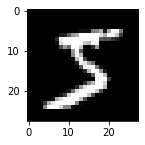

This is a 0


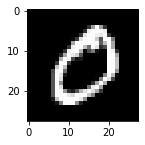

This is a 4


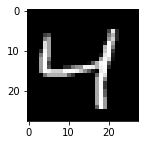

This is a 1


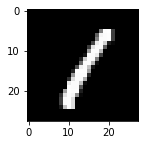

This is a 9


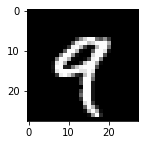

This is a 2


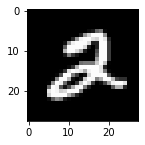

This is a 1


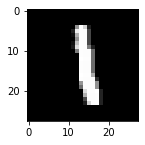

This is a 3


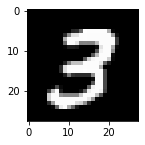

This is a 1


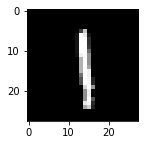

This is a 4


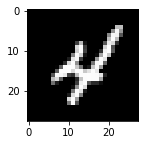

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (2,10)

for i in range(0, 10):
    img = train_set[0][i]
    label = train_set[1][i]
    img_reshape = img.reshape((28,28))
    imgplot = plt.imshow(img_reshape, cmap='gray')
    print('This is a {}'.format(label))
    plt.show()

In [8]:
%%time

import struct
import io
import csv
#import boto3
        
def convert_data():
    data_partitions = [('train', train_set), ('validation', valid_set), ('test', test_set)]
    for data_partition_name, data_partition in data_partitions:
        print('{}: {} {}'.format(data_partition_name, data_partition[0].shape, data_partition[1].shape))
        labels = [t.tolist() for t in data_partition[1]]
        features = [t.tolist() for t in data_partition[0]]
        
        if data_partition_name != 'test':
            examples = np.insert(features, 0, labels, axis=1)
        else:
            examples = features
        #print(examples[50000,:])
        
        
        np.savetxt(os.path.join(data_dir, 'data.csv'), examples, delimiter=',')
        
        #key = "{}/{}/examples".format(prefix,data_partition_name)
        #url = 's3://{}/{}'.format(bucket, key)
        #boto3.Session().resource('s3').Bucket(bucket).Object(key).upload_file('data.csv')
        #print('Done writing to {}'.format(url))
        
convert_data()

train: (50000, 784) (50000,)
validation: (10000, 784) (10000,)
test: (10000, 784) (10000,)
CPU times: user 32.7 s, sys: 3.78 s, total: 36.5 s
Wall time: 39.8 s


In [9]:
import pandas as pd

df = pd.read_csv(os.path.join(data_dir, 'data.csv'))
df.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,0.000000000000000000e+00.658,0.000000000000000000e+00.659,0.000000000000000000e+00.660,0.000000000000000000e+00.661,0.000000000000000000e+00.662,0.000000000000000000e+00.663,0.000000000000000000e+00.664,0.000000000000000000e+00.665,0.000000000000000000e+00.666,0.000000000000000000e+00.667
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Download archives

In [2]:
data_dir = os.path.join('data', 'mnist_digits')

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

os.listdir(data_dir)

[]

In [3]:
download_dir = os.path.join(data_dir, 'downloads')

if not os.path.exists(download_dir):
    os.makedirs(download_dir)

os.listdir(download_dir)

[]

In [4]:
t = time()
# links to datasets
links = [
    'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
    'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
    'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
    'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
]

print('Beginning file download with wget module')

for link in links:
    file_name = link.split('/')[-1] # extract the file name from the link
    print("- downloading file '{0}'".format(file_name))
    wget.download(link, os.path.join(download_dir, file_name))

elapsed = time() - t
print("Download finished, took {0:,.2f} seconds.".format(elapsed))

Beginning file download with wget module
- downloading file 'train-images-idx3-ubyte.gz'
- downloading file 'train-labels-idx1-ubyte.gz'
- downloading file 't10k-images-idx3-ubyte.gz'
- downloading file 't10k-labels-idx1-ubyte.gz'
Download finished, took 2.96 seconds.


In [5]:
os.listdir(download_dir)

['t10k-images-idx3-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

## Unpack archives

In [6]:
archives = glob(os.path.join(download_dir, '*'))
archives

['data/mnist_digits/downloads/t10k-images-idx3-ubyte.gz',
 'data/mnist_digits/downloads/train-images-idx3-ubyte.gz',
 'data/mnist_digits/downloads/t10k-labels-idx1-ubyte.gz',
 'data/mnist_digits/downloads/train-labels-idx1-ubyte.gz']

In [7]:
unpack_dir = os.path.join(data_dir, 'unpacked')
if not os.path.exists(unpack_dir):
    os.makedirs(unpack_dir)
os.listdir(unpack_dir)

[]

In [8]:
t = time()
print("Unpacking archives using gzip module")

for archive in archives:
    file_name = archive.split('/')[-1]
    save_file_name = file_name[:-3]
    print("- unpacking file '{0}'".format(file_name))
    with gzip.open(archive, 'rb') as f_in:
        with open(os.path.join(unpack_dir, save_file_name), 'wb') as f_out:
           shutil.copyfileobj(f_in, f_out)

elapsed = time() - t
print("Unpacking finished, took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Unpacking archives using gzip module
- unpacking file 't10k-images-idx3-ubyte.gz'
- unpacking file 'train-images-idx3-ubyte.gz'
- unpacking file 't10k-labels-idx1-ubyte.gz'
- unpacking file 'train-labels-idx1-ubyte.gz'
Unpacking finished, took 0.76 seconds (0.01 minutes)


In [9]:
os.listdir(unpack_dir)

['t10k-images-idx3-ubyte',
 'train-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 't10k-labels-idx1-ubyte']

## Read images (byte format) into Numpy arrays

In [16]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(
                             len(labels), 784)
        images = ((images / 255.) - .5) * 2

    return images, labels

In [17]:
X_train, y_train = load_mnist(unpack_dir, kind='train')
print('Rows: {0}, columns: {1}'.format(X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist(unpack_dir, kind='t10k')
print('Rows: {0}, columns: {1}'.format(X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


## Plot examples of handwritten digits from the MNIST dataset

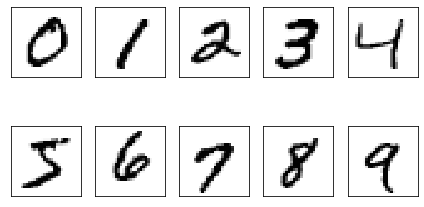

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

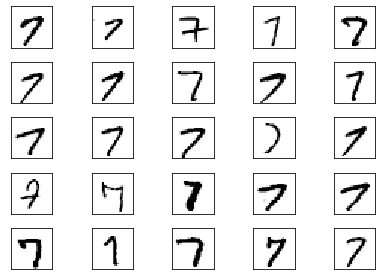

In [19]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Save Numpy arrays to disk

In [20]:
t = time()
np.savez_compressed(os.path.join(data_dir, 'mnist_scaled.npz'),
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)
elapsed = time() - t
print("Numpy arrays saved to disk, took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Numpy arrays saved to disk, took 6.36 seconds (0.11 minutes)
